# Tutelas radicadas en la Corte Constitucional de Colombia en el 2022 y 2021
  Nelson Miguel León García

# Derechos demandados en la Corte Constitucional en 2022

In [ ]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df = pd.read_csv("/content/Derechos_demandados_en_las_tutelas_radicadas_en_la_Corte_Constitucional__A_o_2022 (1).csv")
df

,ID_Expediente,Fecha,Municipio,Departamento,Decisión1,Impugnación,Decisión2,Legitimación,Derecho
0,VEOJMOU,01/11/2022 12:00:00 AM,Funza,Cundinamarca,Improcedente,Sin impugnación,NaN,Personal,TRABAJO
1,VEOJMOJ,01/11/2022 12:00:00 AM,Medellín,Antioquia,Hecho superado,Sin impugnación,NaN,Apoderado,SEGURIDAD SOCIAL
2,VEOJMOH,01/11/2022 12:00:00 AM,Sogamoso,Boyacá,Hecho superado,Con impugnación,Revoca,Personal,DERECHO DE PETICIÓN
3,VEOJMOO,01/11/2022 12:00:00 AM,Envigado,Antioquia,Improcedente,Con impugnación,Revoca,Personal,DEBIDO PROCESO
4,VEOJMOP,01/11/2022 12:00:00 AM,Cúcuta,Norte De Santander,Niega,Con impugnación,Revoca,Personal,DERECHO DE PETICIÓN
...,...,...,...,...,...,...,...,...,...
768115,SJHEMVO,11/30/2022 12:00:00 AM,Medellín,Antioquia,Improcedente,Sin impugnación,NaN,Personal,EDUCACIÓN
768116,SJHEVHO,11/30/2022 12:00:00 AM,Pereira,Risaralda,Niega,Con impugnación,Confirma,Personal,DEBIDO PROCESO
768117,SJHEVHE,11/30/2022 12:00:00 AM,Bogotá,Bogotá,Concede,Sin impugnación,NaN,Personal,DERECHO DE PETICIÓN
768118,SJHEVOJ,11/30/2022 12:00:00 AM,Duitama,Boyacá,Improcedente,Sin impugnación,NaN,Personal,MÍNIMO VITAL


In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m/%d/%Y %I:%M:%S %p')
# Crear un diccionario con los nombres de los meses en español
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
         7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

# Crear una columna nueva que contenga el nombre del mes 
df['Mes'] = df['Fecha'].dt.strftime('%m').apply(lambda x: meses[int(x)])


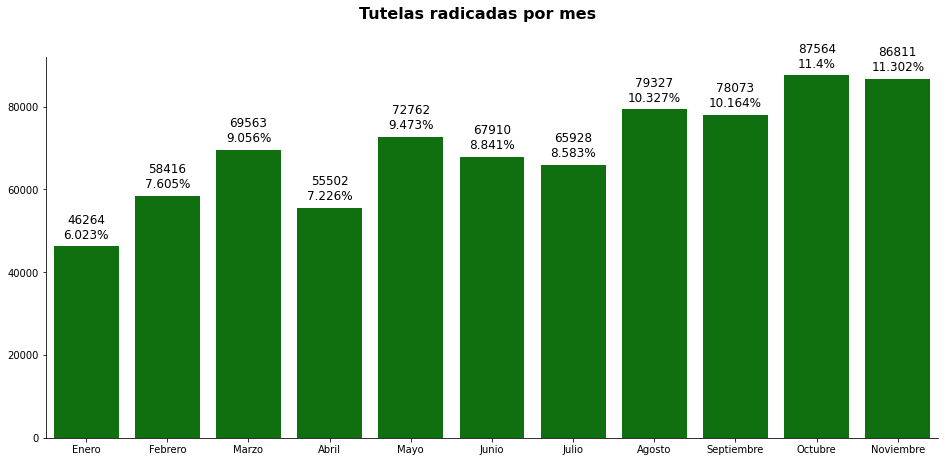

In [ ]:


plt.figure(figsize=(16,7))

ex = sns.countplot(x='Mes', data=df, color='green')

for p in ex.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    value = int(p.get_height())
    percentage = round(100 / (df.shape[0]) * p.get_height(), 3)

    ex.annotate(f'{value}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.xlabel("") 
plt.ylabel("") 

sns.despine()


plt.suptitle("Tutelas radicadas por mes", fontsize=16, fontweight='bold')

plt.show()



## Grafico Derechos demandados en 2022

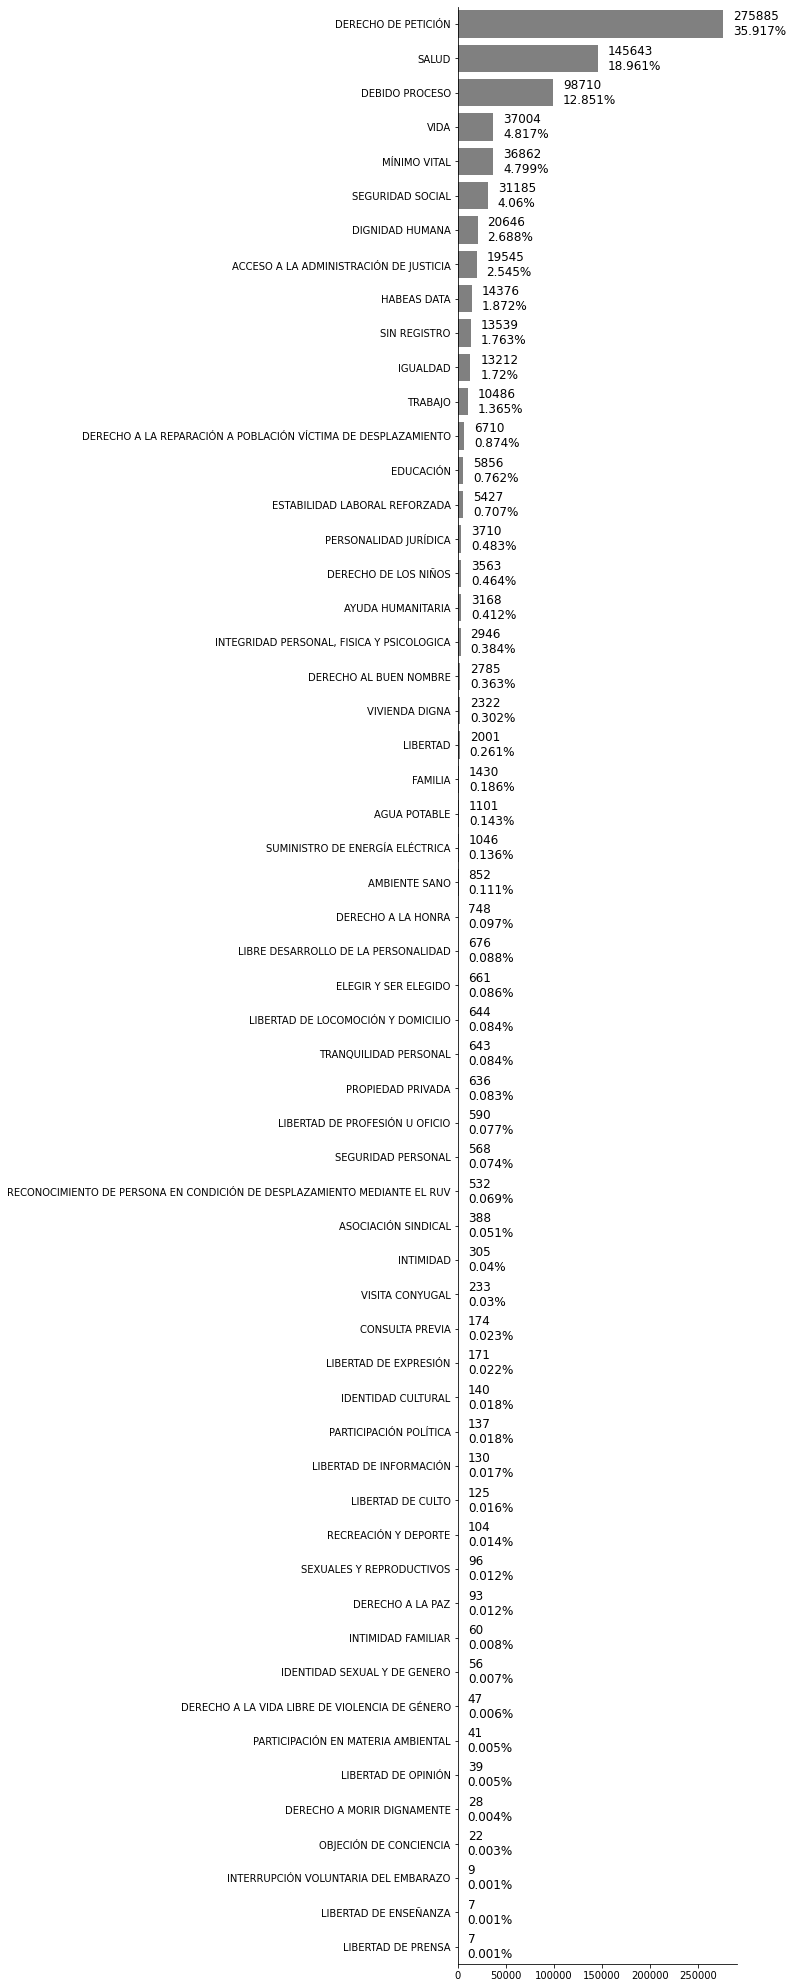

In [ ]:
count_order = df['Derecho'].value_counts().index.tolist()


plt.figure(figsize=(5, 36))

ex = sns.countplot(y='Derecho', data=df, color='grey', order=count_order)

for p in ex.patches:
    x_pos = p.get_width() + 10
    y_pos = p.get_y() + p.get_height() / 2
    value = int(p.get_width())
    percentage = round(100 / (df.shape[0]) * p.get_width(), 3)

    ex.annotate(f'{value}\n{percentage}%', (x_pos, y_pos), xytext=(10, 0),
                textcoords='offset points', ha='left', va='center', fontsize=12)

plt.xlabel("") 
plt.ylabel("") 

sns.despine()


plt.show()



## Decisión en primera instancia 2022 

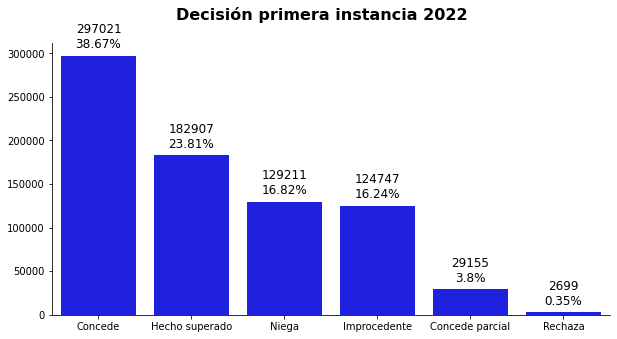

In [ ]:
count_order = df['Decisión1'].value_counts().index.tolist()
plt.figure(figsize=(10,5))

ex = sns.countplot(x='Decisión1', data=df, color='blue', order=count_order) # especificar el color gris

#Agregar etiquetas 
for p in ex.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    value = int(p.get_height())
    percentage = round(100 / (df.shape[0]) * p.get_height(), 2)
    # Agrega una etiqueta con el valor y el porcentaje sobre la barra
    ex.annotate(f'{value}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.xlabel("") 
plt.ylabel("") 

# Elimina los bordes de la gráfica
sns.despine()

plt.suptitle("Decisión primera instancia 2022", fontsize=16, fontweight='bold')

# Mostramos el gráfico
plt.show()


### Decisión primera instancia por mes

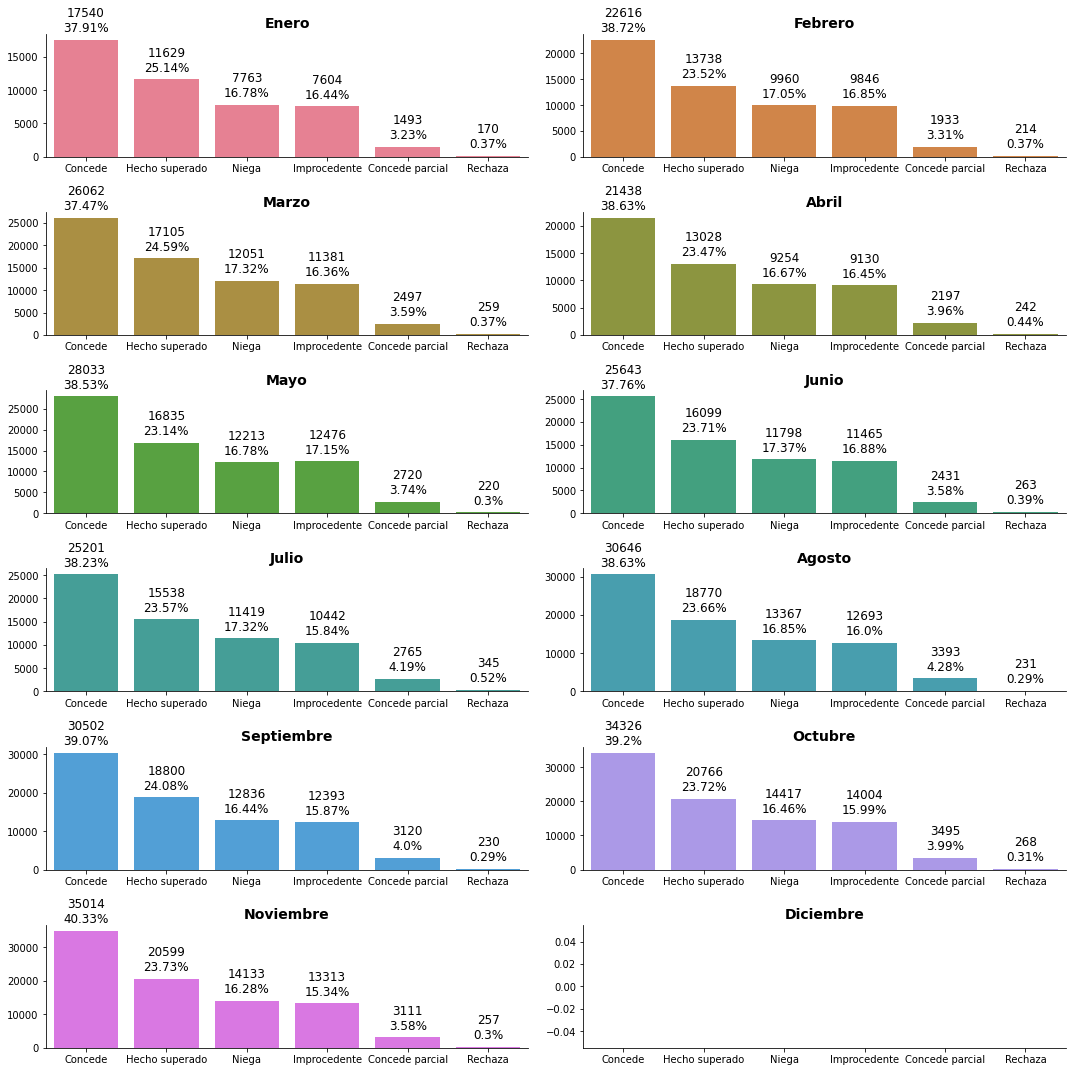

In [ ]:
# Crear un dataframe por cada mes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_meses = [df[df['Fecha'].dt.month == i] for i in range(1, 13)]

# Crear la figura y las subgráficas
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 15))

axs = axs.flatten() # aplanar las subgráficas para poder iterar sobre ellas

# Iterar sobre cada subgráfica y generar el gráfico correspondiente para cada mes
palette = sns.color_palette('husl', len(df_meses))

for i, ax in enumerate(axs):
    count_order = df['Decisión1'].value_counts().index.tolist()
    ex = sns.countplot(x='Decisión1', data=df_meses[i],  color=palette[i], order=count_order, ax=ax)
    ax.set_title(meses[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    for p in ex.patches:
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        if np.isnan(y_pos):
            value = ''
        else:
            value = int(y_pos)
        if df_meses[i].empty:
           percentage = 0
        else:
            percentage = round(100 / (df_meses[i].shape[0]) * p.get_height(), 2)
    
        ax.annotate(f'{value}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                    textcoords='offset points', ha='center', va='bottom', fontsize=12)
        sns.despine()

# Ajustar los espacios entre las subgráficas
plt.tight_layout()


# Mostrar la figura
plt.show()

## Decisión en segunda instancia 

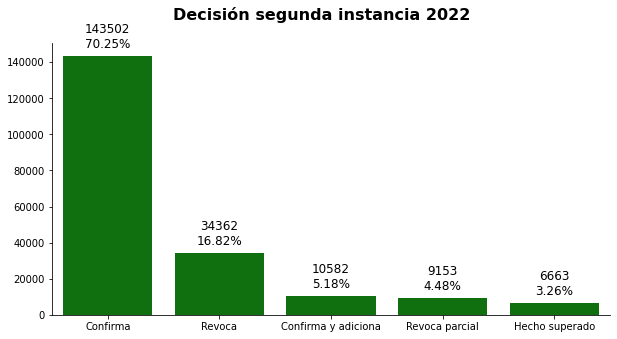

In [ ]:
count_order = df['Decisión2'].value_counts().dropna().index.tolist() 
plt.figure(figsize=(10,5))

ex = sns.countplot(x='Decisión2', data=df, color='green', order=count_order) 

#Agregar etiquetas 
for p in ex.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    value = int(p.get_height())
    percentage = round(100 / (df['Decisión2'].dropna().shape[0]) * p.get_height(), 2)
    # Agrega una etiqueta con el valor y el porcentaje sobre la barra
    ex.annotate(f'{value}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.xlabel("") 
plt.ylabel("") 

# Elimina los bordes de la gráfica
sns.despine()

plt.suptitle("Decisión segunda instancia 2022", fontsize=16, fontweight='bold')

# Mostramos el gráfico
plt.show()


### Decisión en segunda instancia por mes


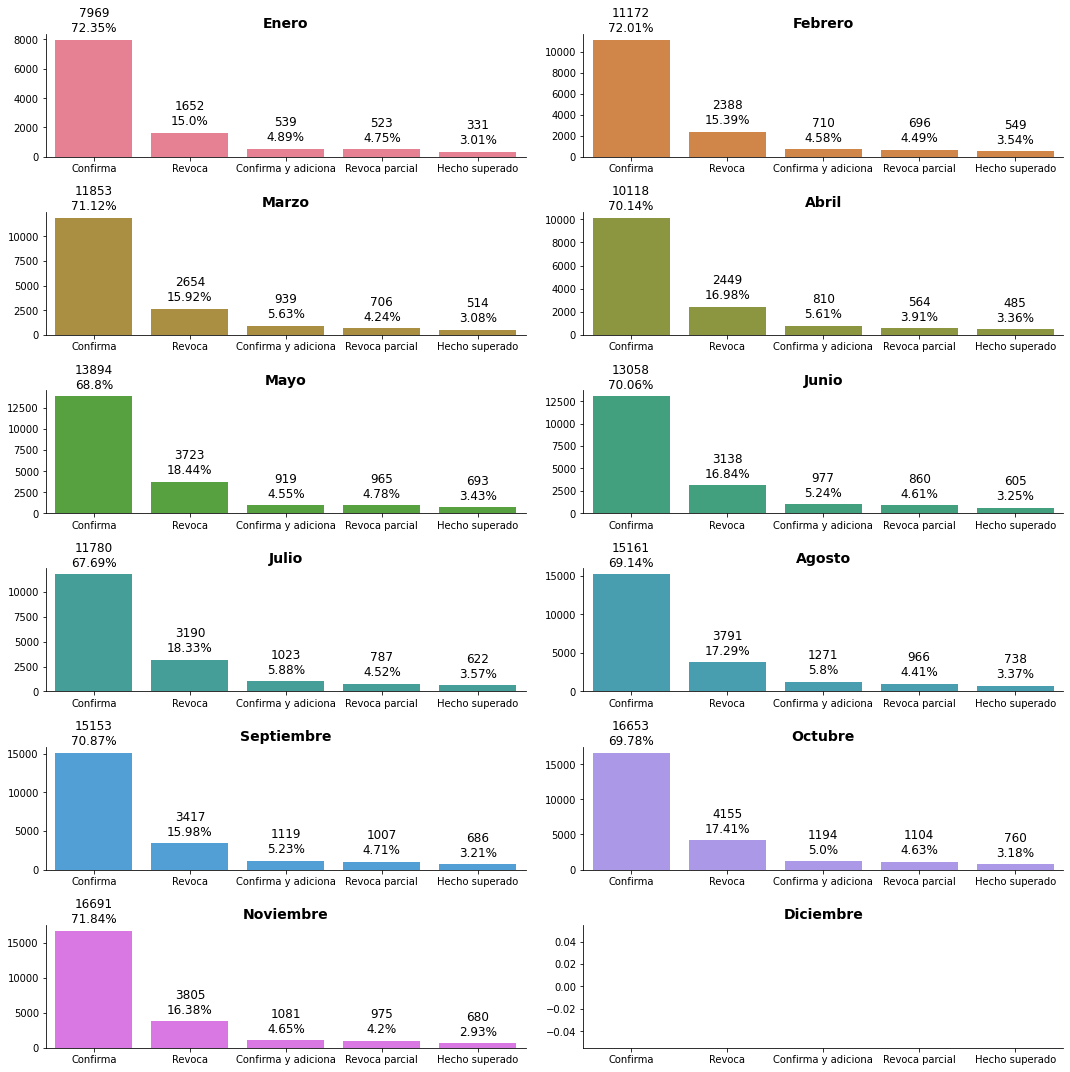

In [ ]:
# Crear un dataframe por cada mes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_meses = [df[df['Fecha'].dt.month == i] for i in range(1, 13)]

# Crear la figura y las subgráficas
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 15))

axs = axs.flatten() # aplanar las subgráficas para poder iterar sobre ellas

# Iterar sobre cada subgráfica y generar el gráfico correspondiente para cada mes
palette = sns.color_palette('husl', len(df_meses))

for i, ax in enumerate(axs):
    count_order = df['Decisión2'].value_counts().dropna().index.tolist()
    ex = sns.countplot(x='Decisión2', data=df_meses[i],  color=palette[i], order=count_order, ax=ax)
    ax.set_title(meses[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    for p in ex.patches:
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        if np.isnan(y_pos):
            value = ''
        else:
            value = int(y_pos)
        if df_meses[i].empty:
           percentage = 0
        else:
            percentage = round(100 / (df_meses[i].dropna().shape[0]) * p.get_height(), 2)
    
        ax.annotate(f'{value}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                    textcoords='offset points', ha='center', va='bottom', fontsize=12)
        sns.despine()

# Ajustar los espacios entre las subgráficas
plt.tight_layout()


# Mostrar la figura
plt.show()

## Impugnación

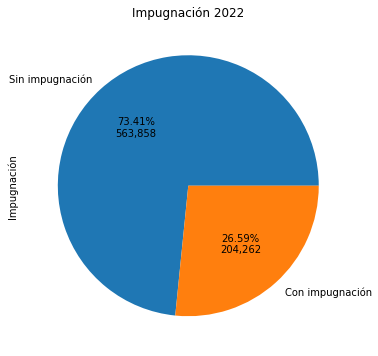

In [ ]:
plot = df['Impugnación'].value_counts().plot(kind='pie', autopct=lambda pct: f"{pct:.2f}%\n{'{:,.0f}'.format(pct/100*len(df))}", 
                                             figsize=(6, 6), title='Impugnación 2022')


### Impugnación por meses

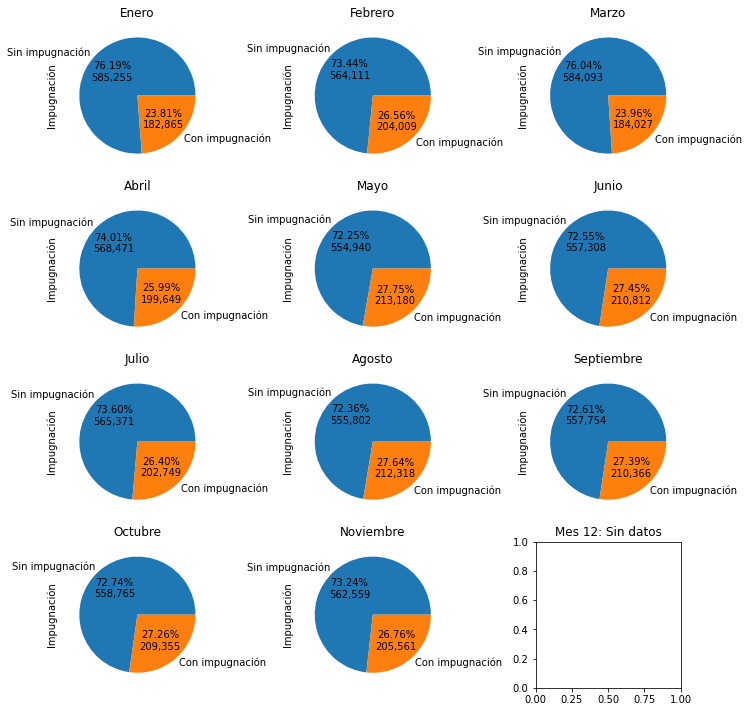

In [ ]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_meses = [df[df['Fecha'].dt.month == i] for i in range(1, 13)]


# Crear un dataframe por cada mes
df_meses = [df[df['Fecha'].dt.month == i] for i in range(1, 13)]

# Crear la figura y las subtramas
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

# Aplanar las subtramas para poder iterar sobre ellas
axs = axs.flatten()


# Iterar sobre cada subtrama y generar el gráfico correspondiente para cada mes
for i, ax in enumerate(axs):
    mes = i + 1
    df_mes = df_meses[i]
    if not df_mes.empty:
        plot = df_mes['Impugnación'].value_counts().plot(kind='pie', autopct=lambda pct: f"{pct:.2f}%\n{'{:,.0f}'.format(pct/100*len(df))}", ax=ax, title=f'{meses[i]}')
    else:
        ax.set_title(f'Mes {mes}: Sin datos')

# Ajustar los espacios entre las subtramas y mostrar la figura
plt.tight_layout()
plt.show()



## Legitimación

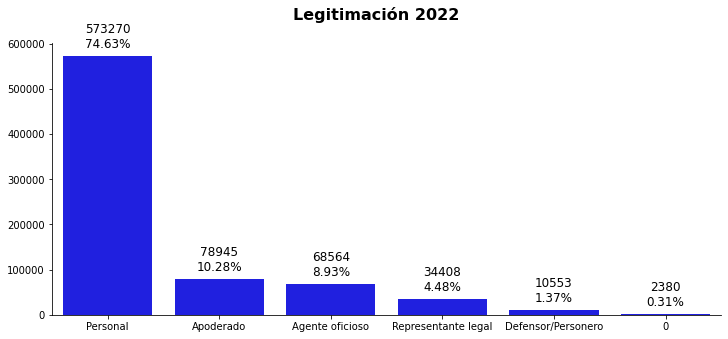

In [ ]:
count_order = df['Legitimación'].value_counts().index.tolist()
plt.figure(figsize=(12,5))

ex = sns.countplot(x='Legitimación', data=df, color='blue', order=count_order) # especificar el color gris

#Agregar etiquetas 
for p in ex.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    value = int(p.get_height())
    percentage = round(100 / (df.shape[0]) * p.get_height(), 2)
    # Agrega una etiqueta con el valor y el porcentaje sobre la barra
    ex.annotate(f'{value}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.xlabel("") 
plt.ylabel("") 

# Elimina los bordes de la gráfica
sns.despine()

plt.suptitle("Legitimación 2022", fontsize=16, fontweight='bold')

# Mostramos el gráfico
plt.show()


### Legitimación por mes

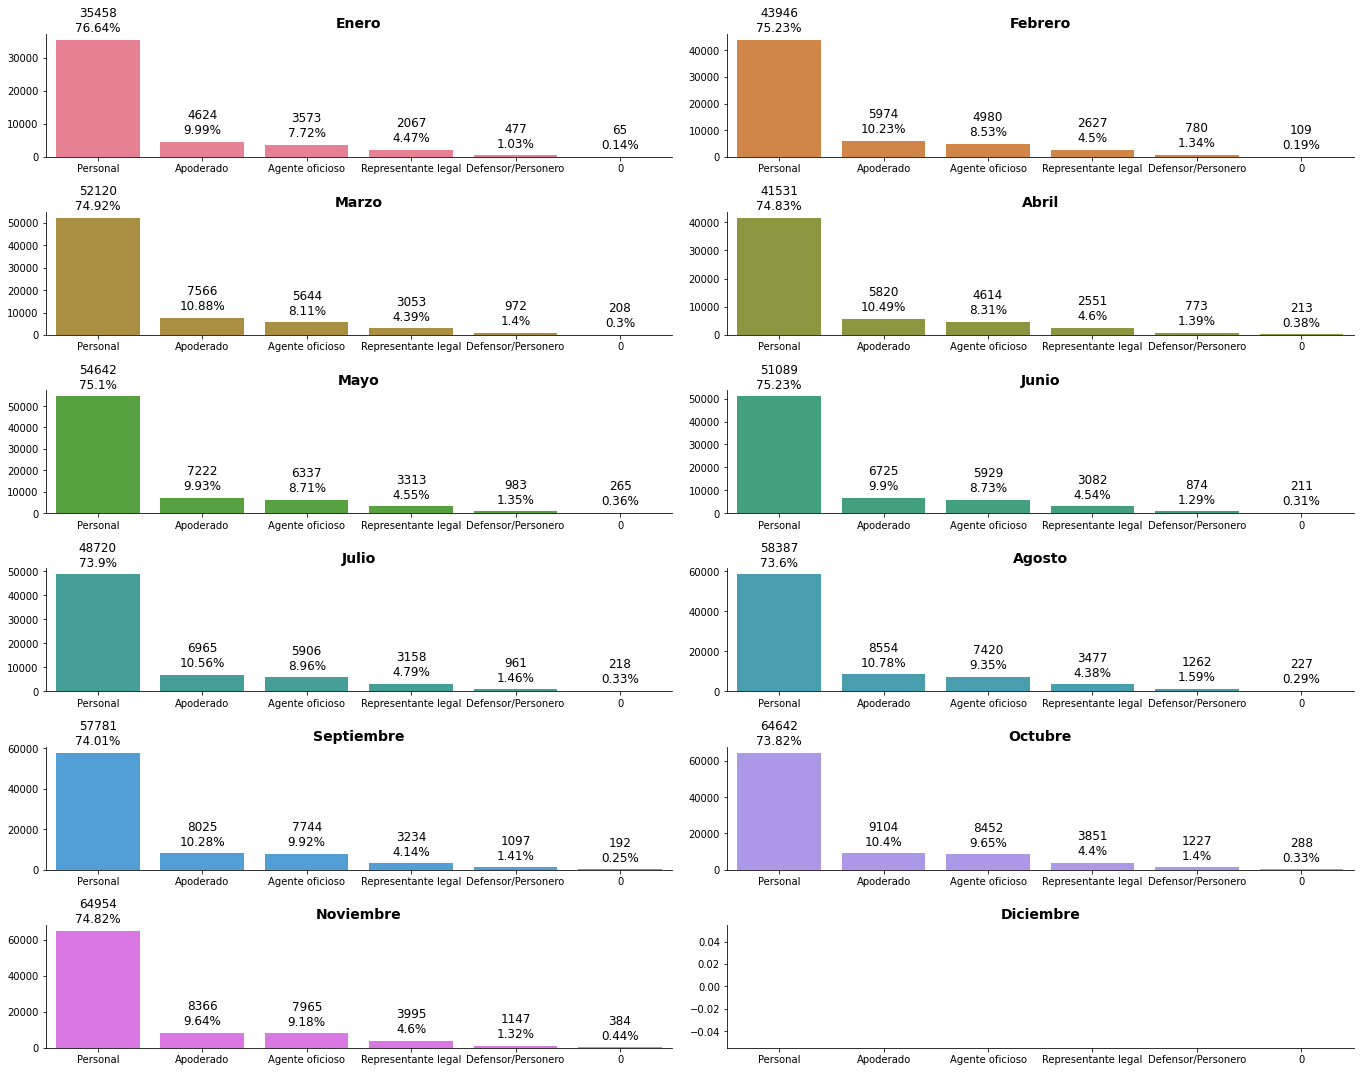

In [ ]:
# Crear un dataframe por cada mes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_meses = [df[df['Fecha'].dt.month == i] for i in range(1, 13)]

# Crear la figura y las subgráficas
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(19, 15))

axs = axs.flatten() # aplanar las subgráficas para poder iterar sobre ellas

# Iterar sobre cada subgráfica y generar el gráfico correspondiente para cada mes
palette = sns.color_palette('husl', len(df_meses))

for i, ax in enumerate(axs):
    count_order = df['Legitimación'].value_counts().index.tolist()
    ex = sns.countplot(x='Legitimación', data=df_meses[i],  color=palette[i], order=count_order, ax=ax)
    ax.set_title(meses[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    for p in ex.patches:
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        if np.isnan(y_pos):
            value = ''
        else:
            value = int(y_pos)
        if df_meses[i].empty:
           percentage = 0
        else:
            percentage = round(100 / (df_meses[i].shape[0]) * p.get_height(), 2)
    
        ax.annotate(f'{value}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                    textcoords='offset points', ha='center', va='bottom', fontsize=12)
        sns.despine()

# Ajustar los espacios entre las subgráficas
plt.tight_layout()


# Mostrar la figura
plt.show()

## Conclusión
Se evidencia que el mes con menos tutelas fue enero con 6.023% de la tutelas y  octubre fue el mes con mayor número de tutelas con 11.4%. El derecho mayormente tutelado fue el derecho de petición seguido por el derecho a la salud.  Se observa que cerca de un cuarto de las tutelas son impugnadas y en segunda instancia cerca del 70% son confirmadas, esto muestra una coherencia en las desiciones de la corte sobre las tutelas.

De los graficos mensuales se puede apreciar que la información mes a mes tiene un comportamiento practicamente constante ya que los graficos se parecen entre meses y solo cambian algunas unidades que no son muy significativas. Hace falta la información del mes de diciembre. 

# Pretenciones reclamadas en 2021

In [ ]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df2 = pd.read_csv("/content/Pretensiones_reclamadas_en_las_tutelas_radicadas_en_la_Corte_Constitucional__A_o_2021.csv")
df2

,ID_Expediente,Fecha,Municipio,Departamento,Decisión1,Impugnación,Decisión2,Legitimación,Derecho,Pretensión
0,CRECFSL,01/12/2021 12:00:00 AM,Bogotá,Bogotá,Niega,Con impugnación,Confirma,Apoderado,DEBIDO PROCESO,Protección del debido proceso administrativo
1,CRECFSE,01/12/2021 12:00:00 AM,Bogotá,Bogotá,Niega,Con impugnación,Confirma,Personal,DEBIDO PROCESO,Protección del debido proceso administrativo
2,CRECFSS,01/12/2021 12:00:00 AM,Sincelejo,Sucre,Niega,Sin impugnación,NaN,Personal,MÍNIMO VITAL,Garantía de las condiciones básicas de subsist...
3,CRECFSC,01/12/2021 12:00:00 AM,Los Palmitos,Sucre,Concede,Sin impugnación,NaN,Personal,SALUD,Entrega oportuna de medicamentos o insumos
4,CRECFSA,01/12/2021 12:00:00 AM,Majagual,Sucre,Concede,Sin impugnación,NaN,Representante legal,DERECHO DE PETICIÓN,"Solicitud de información, copias, procedimientos"
...,...,...,...,...,...,...,...,...,...,...
668164,CESCCNE,04/07/2021 12:00:00 AM,Bogotá,Bogotá,Improcedente,Con impugnación,Confirma,Personal,HABEAS DATA,"Corrección, aclaración, rectificación, o actua..."
668165,CESCCFR,04/07/2021 12:00:00 AM,Tunja,Boyacá,Hecho superado,Sin impugnación,NaN,Personal,DEBIDO PROCESO,Protección del debido proceso administrativo
668166,CESCCFL,04/07/2021 12:00:00 AM,Medellín,Antioquia,Concede,Sin impugnación,NaN,Personal,DERECHO DE PETICIÓN,"Solicitud de información, copias, procedimientos"
668167,CESCCFA,04/07/2021 12:00:00 AM,Carepa,Antioquia,Concede,Sin impugnación,NaN,Personal,DERECHO A LA REPARACIÓN A POBLACIÓN VÍCTIMA DE...,Reparación integral


In [ ]:
df2['Fecha'] = pd.to_datetime(df2['Fecha'], format='%m/%d/%Y %I:%M:%S %p')
# Crear un diccionario con los nombres de los meses en español
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
         7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

# Crear una columna nueva que contenga el nombre del mes 
df2['Mes'] = df2['Fecha'].dt.strftime('%m').apply(lambda x: meses[int(x)])

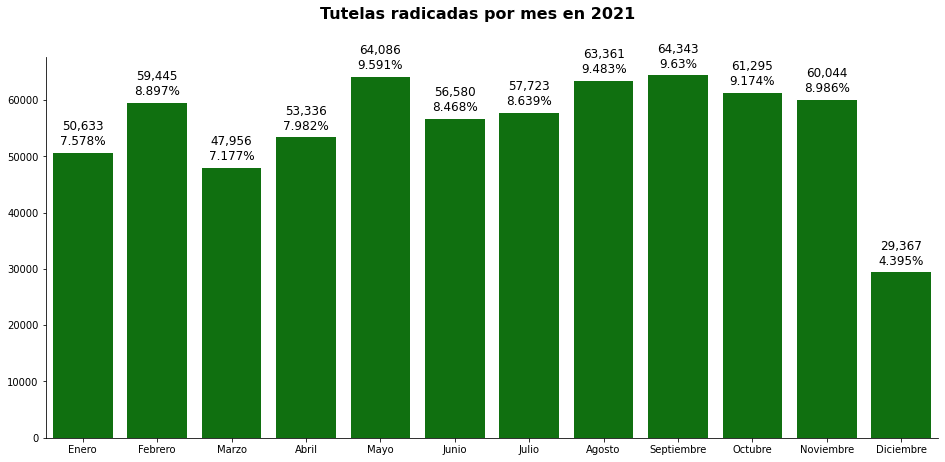

In [ ]:
# Crear una columna nueva que contenga el número de mes
df2['Num_Mes'] = df2['Fecha'].dt.month


# Especificar el orden de los meses en el gráfico
mes_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(16,7))

ex = sns.countplot(x='Mes', data=df2, color='green', order=mes_order)

for p in ex.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    value = int(p.get_height())
    percentage = round(100 / (df2.shape[0]) * p.get_height(), 3)

    ex.annotate(f'{value:,}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.xlabel("") 
plt.ylabel("") 

sns.despine()


plt.suptitle("Tutelas radicadas por mes en 2021", fontsize=16, fontweight='bold')

plt.show()



## Derechos demandados en 2021

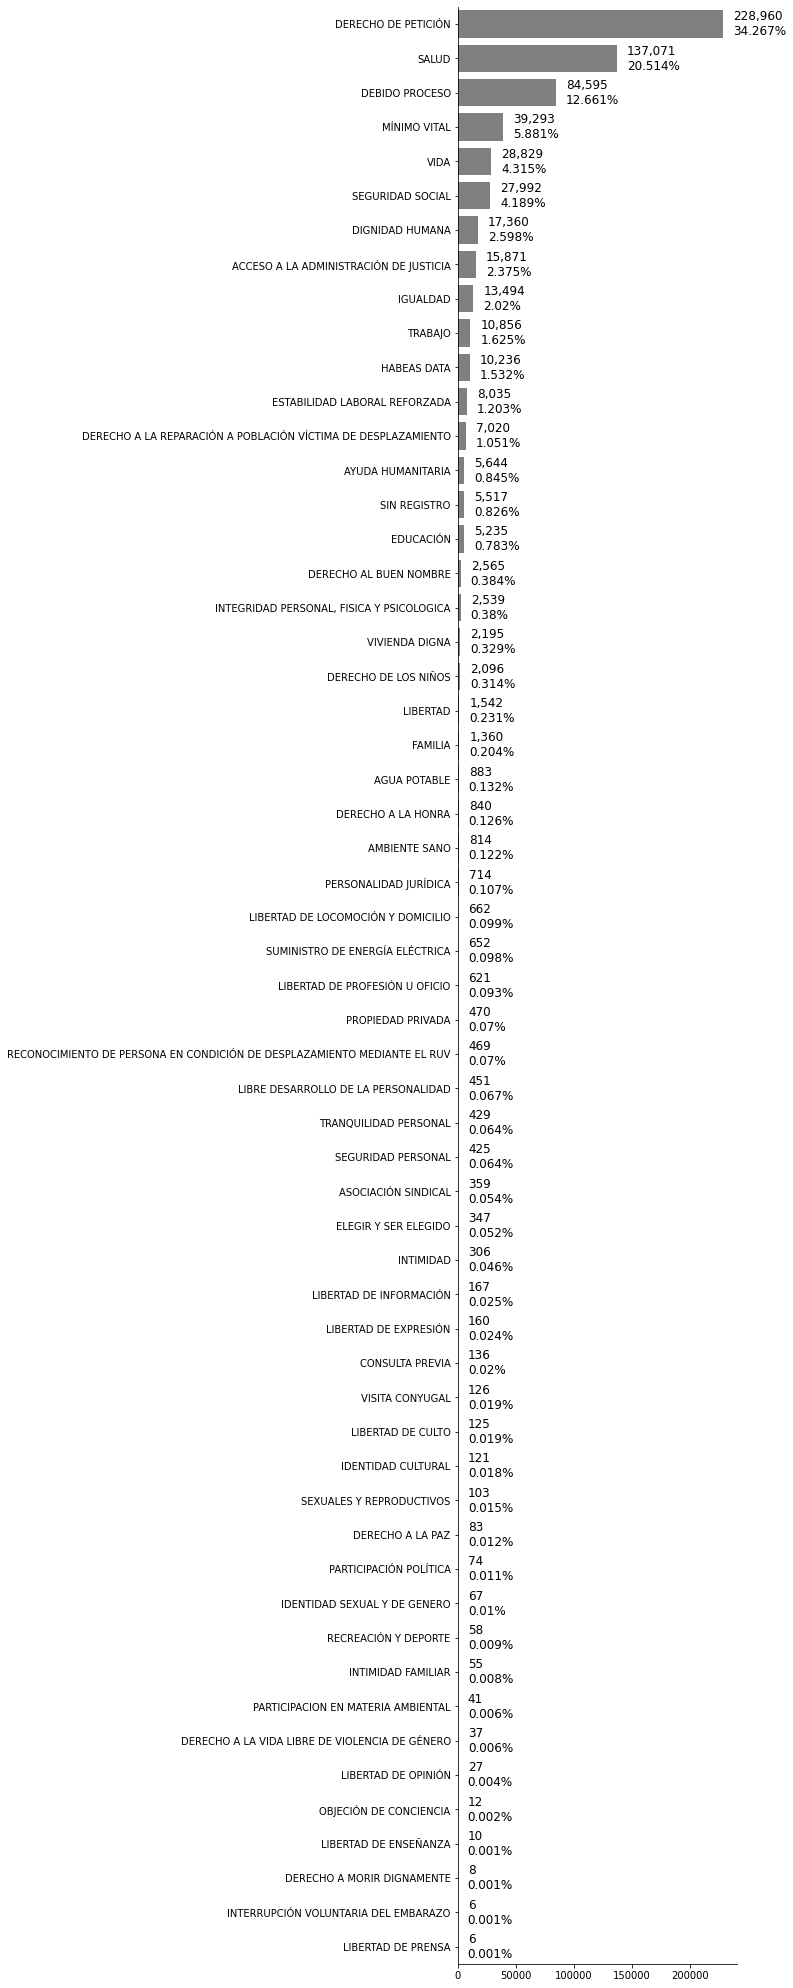

In [ ]:
count_order = df2['Derecho'].value_counts().index.tolist()


plt.figure(figsize=(5, 36))

ex = sns.countplot(y='Derecho', data=df2, color='grey', order=count_order)

for p in ex.patches:
    x_pos = p.get_width() + 10
    y_pos = p.get_y() + p.get_height() / 2
    value = int(p.get_width())
    percentage = round(100 / (df2.shape[0]) * p.get_width(), 3)

    ex.annotate(f'{value:,}\n{percentage}%', (x_pos, y_pos), xytext=(10, 0),
                textcoords='offset points', ha='left', va='center', fontsize=12)

plt.xlabel("") 
plt.ylabel("") 

sns.despine()


plt.show()



## Pretenciones de tutelas en 2021

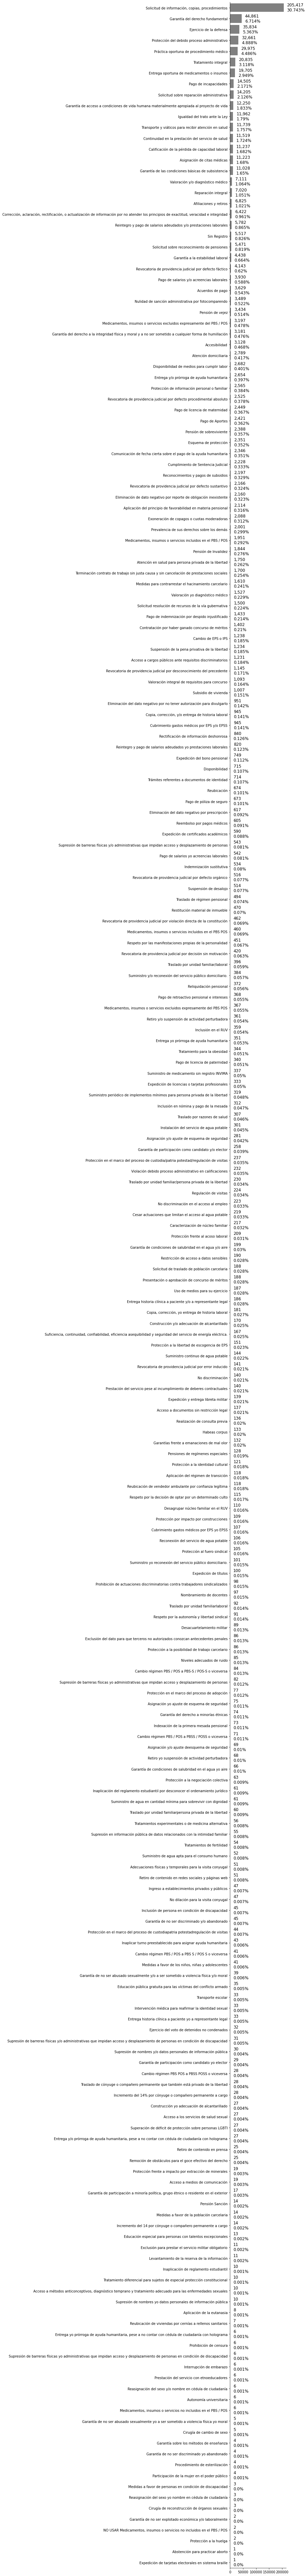

In [ ]:
count_order = df2['Pretensión'].value_counts().index.tolist()


plt.figure(figsize=(3, 140))

ex = sns.countplot(y='Pretensión', data=df2, color='grey', order=count_order)

for p in ex.patches:
    x_pos = p.get_width() + 10
    y_pos = p.get_y() + p.get_height() / 2
    value = int(p.get_width())
    percentage = round(100 / (df2.shape[0]) * p.get_width(), 3)

    ex.annotate(f'{value:,}\n{percentage}%', (x_pos, y_pos), xytext=(10, 0),
                textcoords='offset points', ha='left', va='center', fontsize=12)

plt.xlabel("") 
plt.ylabel("") 

sns.despine()


plt.show()



## Decisión primera instancia 2021

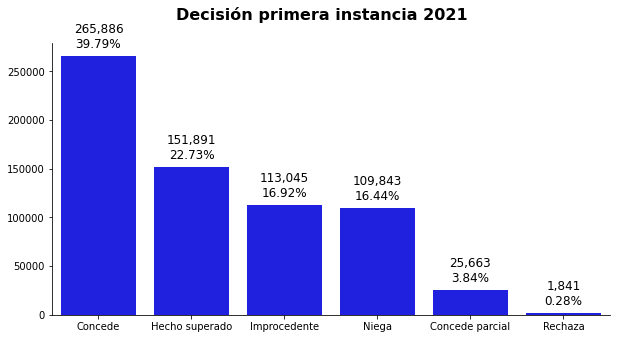

In [ ]:
count_order = df2['Decisión1'].value_counts().index.tolist()
plt.figure(figsize=(10,5))

ex = sns.countplot(x='Decisión1', data=df2, color='blue', order=count_order) # especificar el color gris

#Agregar etiquetas 
for p in ex.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    value = int(p.get_height())
    percentage = round(100 / (df2.shape[0]) * p.get_height(), 2)
    # Agrega una etiqueta con el valor y el porcentaje sobre la barra
    ex.annotate(f'{value:,}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.xlabel("") 
plt.ylabel("") 

# Elimina los bordes de la gráfica
sns.despine()

plt.suptitle("Decisión primera instancia 2021", fontsize=16, fontweight='bold')

# Mostramos el gráfico
plt.show()


### Decisión primera instancia 2021 por mes

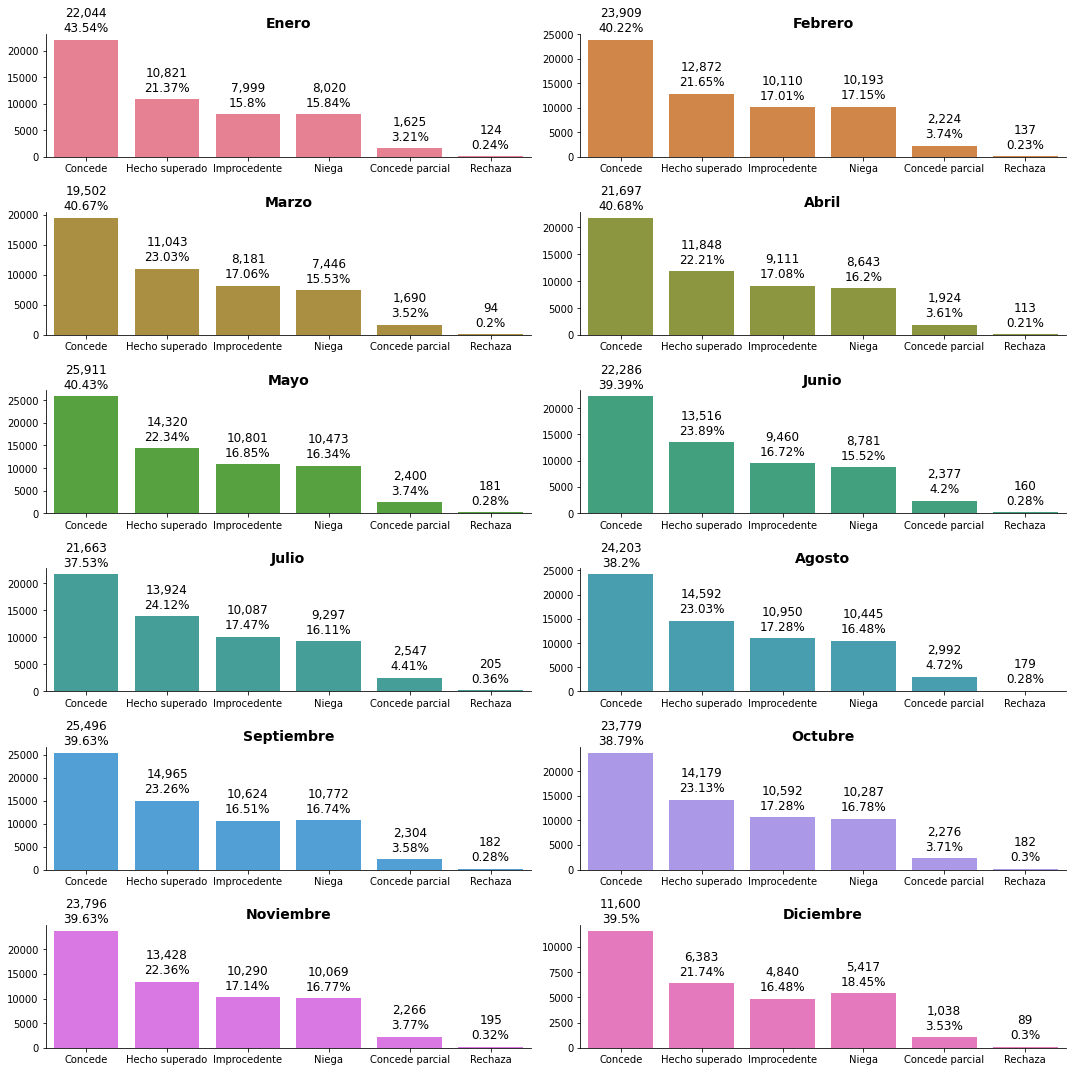

In [ ]:
# Crear un dataframe por cada mes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df2_meses = [df2[df2['Fecha'].dt.month == i] for i in range(1, 13)]

# Crear la figura y las subgráficas
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 15))

axs = axs.flatten() # aplanar las subgráficas para poder iterar sobre ellas

# Iterar sobre cada subgráfica y generar el gráfico correspondiente para cada mes
palette = sns.color_palette('husl', len(df2_meses))

for i, ax in enumerate(axs):
    count_order = df2['Decisión1'].value_counts().index.tolist()
    ex = sns.countplot(x='Decisión1', data=df2_meses[i],  color=palette[i], order=count_order, ax=ax)
    ax.set_title(meses[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    for p in ex.patches:
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        if np.isnan(y_pos):
            value = ''
        else:
            value = int(y_pos)
        if df2_meses[i].empty:
           percentage = 0
        else:
            percentage = round(100 / (df2_meses[i].shape[0]) * p.get_height(), 2)
    
        ax.annotate(f'{value:,}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                    textcoords='offset points', ha='center', va='bottom', fontsize=12)
        sns.despine()

# Ajustar los espacios entre las subgráficas
plt.tight_layout()


# Mostrar la figura
plt.show()

## Decisión en segunda instancia 2021

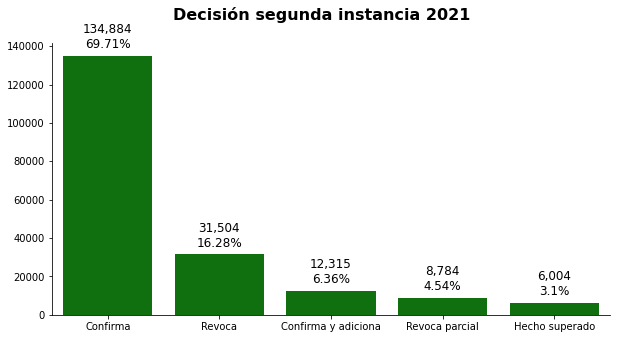

In [ ]:
count_order = df2['Decisión2'].value_counts().dropna().index.tolist() 
plt.figure(figsize=(10,5))

ex = sns.countplot(x='Decisión2', data=df2, color='green', order=count_order) 

#Agregar etiquetas 
for p in ex.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    value = int(p.get_height())
    percentage = round(100 / (df2['Decisión2'].dropna().shape[0]) * p.get_height(), 2)
    # Agrega una etiqueta con el valor y el porcentaje sobre la barra
    ex.annotate(f'{value:,}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.xlabel("") 
plt.ylabel("") 

# Elimina los bordes de la gráfica
sns.despine()

plt.suptitle("Decisión segunda instancia 2021", fontsize=16, fontweight='bold')

# Mostramos el gráfico
plt.show()


### Decisión en segunda instancia por mes 2021


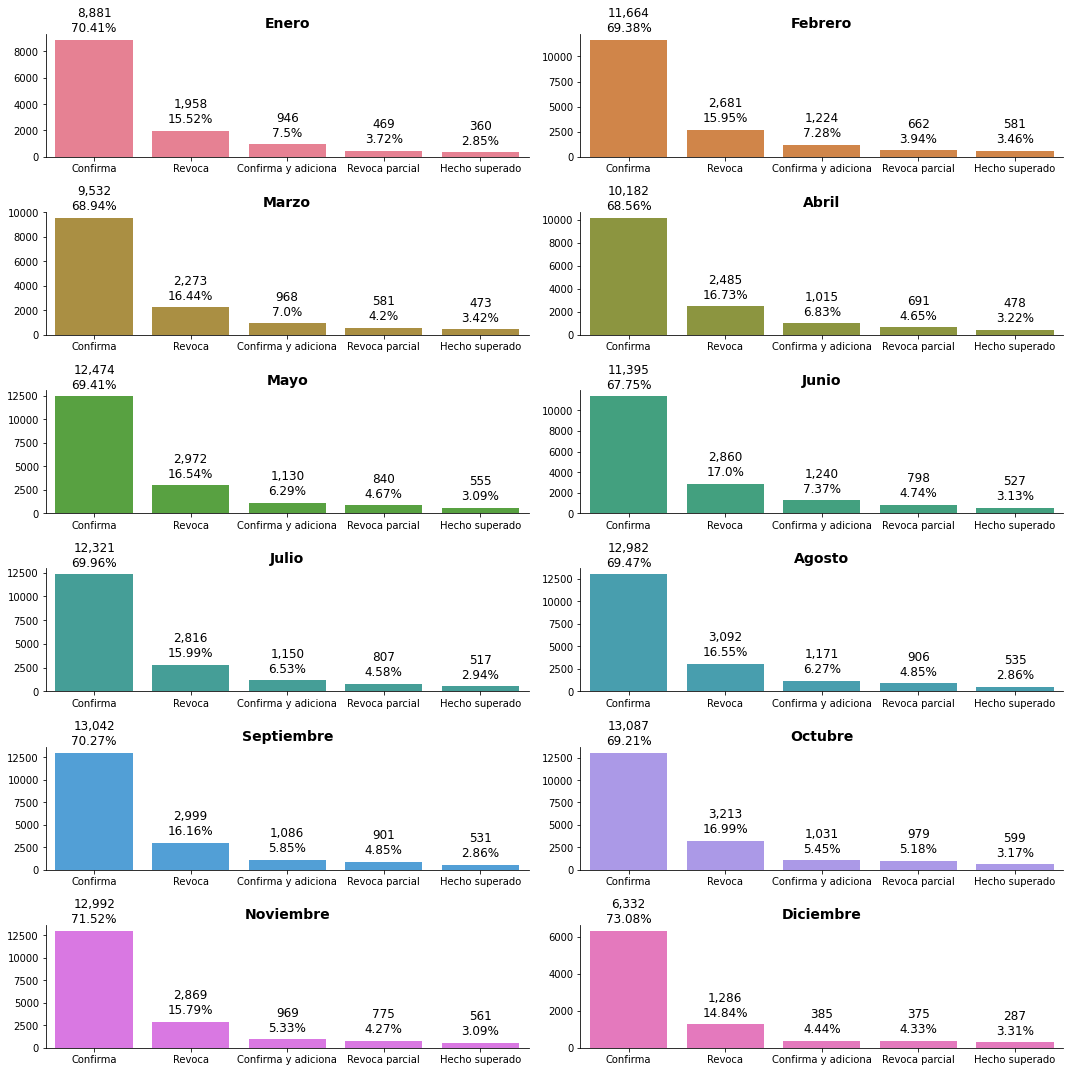

In [ ]:
# Crear un dataframe por cada mes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df2_meses = [df2[df2['Fecha'].dt.month == i] for i in range(1, 13)]

# Crear la figura y las subgráficas
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 15))

axs = axs.flatten() # aplanar las subgráficas para poder iterar sobre ellas

# Iterar sobre cada subgráfica y generar el gráfico correspondiente para cada mes
palette = sns.color_palette('husl', len(df2_meses))

for i, ax in enumerate(axs):
    count_order = df2['Decisión2'].value_counts().dropna().index.tolist()
    ex = sns.countplot(x='Decisión2', data=df2_meses[i],  color=palette[i], order=count_order, ax=ax)
    ax.set_title(meses[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    for p in ex.patches:
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        if np.isnan(y_pos):
            value = ''
        else:
            value = int(y_pos)
        if df2_meses[i].empty:
           percentage = 0
        else:
            percentage = round(100 / (df2_meses[i].dropna().shape[0]) * p.get_height(), 2)
    
        ax.annotate(f'{value:,}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                    textcoords='offset points', ha='center', va='bottom', fontsize=12)
        sns.despine()

# Ajustar los espacios entre las subgráficas
plt.tight_layout()


# Mostrar la figura
plt.show()

## Impugnación 2021

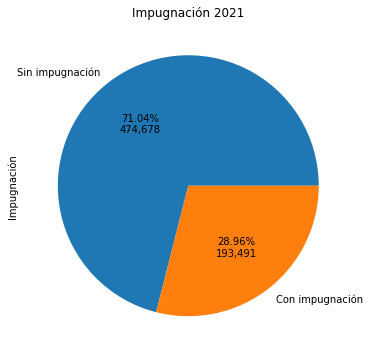

In [ ]:
plot = df2['Impugnación'].value_counts().plot(kind='pie', autopct=lambda pct: f"{pct:.2f}%\n{'{:,.0f}'.format(pct/100*len(df2))}",
                                             figsize=(6, 6), title='Impugnación 2021')


### Impugnación por meses 2021

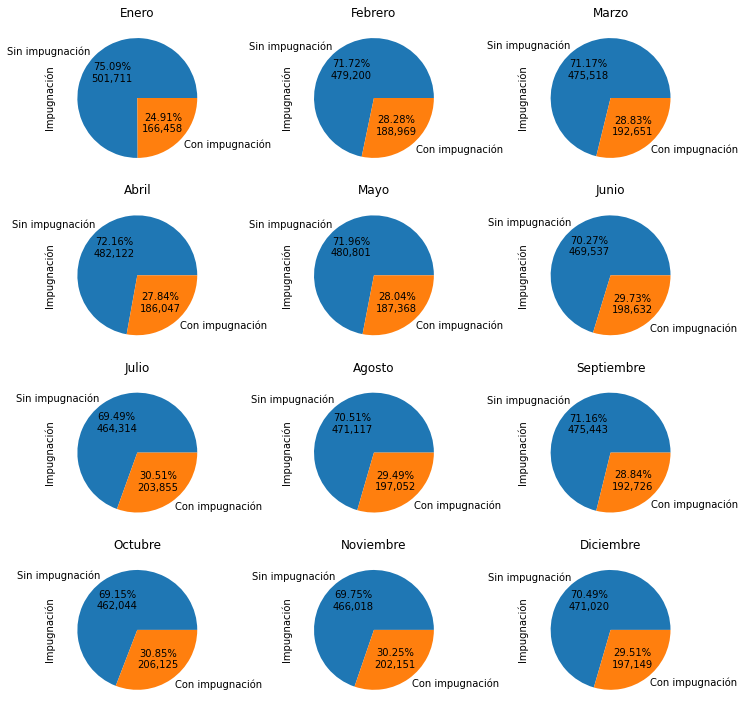

In [ ]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df2_meses = [df2[df2['Fecha'].dt.month == i] for i in range(1, 13)]


# Crear un dataframe por cada mes
df2_meses = [df2[df2['Fecha'].dt.month == i] for i in range(1, 13)]

# Crear la figura y las subtramas
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

# Aplanar las subtramas para poder iterar sobre ellas
axs = axs.flatten()


# Iterar sobre cada subtrama y generar el gráfico correspondiente para cada mes
for i, ax in enumerate(axs):
    mes = i + 1
    df2_mes = df2_meses[i]
    if not df2_mes.empty:
        plot = df2_mes['Impugnación'].value_counts().plot(kind='pie', autopct=lambda pct: f"{pct:.2f}%\n{'{:,.0f}'.format(pct/100*len(df2))}", ax=ax, title=f'{meses[i]}')
    else:
        ax.set_title(f'Mes {mes}: Sin datos')

# Ajustar los espacios entre las subtramas y mostrar la figura
plt.tight_layout()
plt.show()



## Legitimación 2021

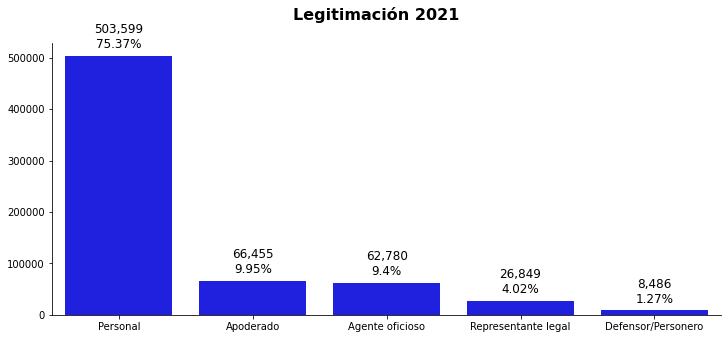

In [ ]:
count_order = df2['Legitimación'].value_counts().index.tolist()
plt.figure(figsize=(12,5))

ex = sns.countplot(x='Legitimación', data=df2, color='blue', order=count_order) # especificar el color gris

#Agregar etiquetas 
for p in ex.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    value = int(p.get_height())
    percentage = round(100 / (df2.shape[0]) * p.get_height(), 2)
    # Agrega una etiqueta con el valor y el porcentaje sobre la barra
    ex.annotate(f'{value:,}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.xlabel("") 
plt.ylabel("") 

# Elimina los bordes de la gráfica
sns.despine()

plt.suptitle("Legitimación 2021", fontsize=16, fontweight='bold')

# Mostramos el gráfico
plt.show()


### Legitimación por mes 2021

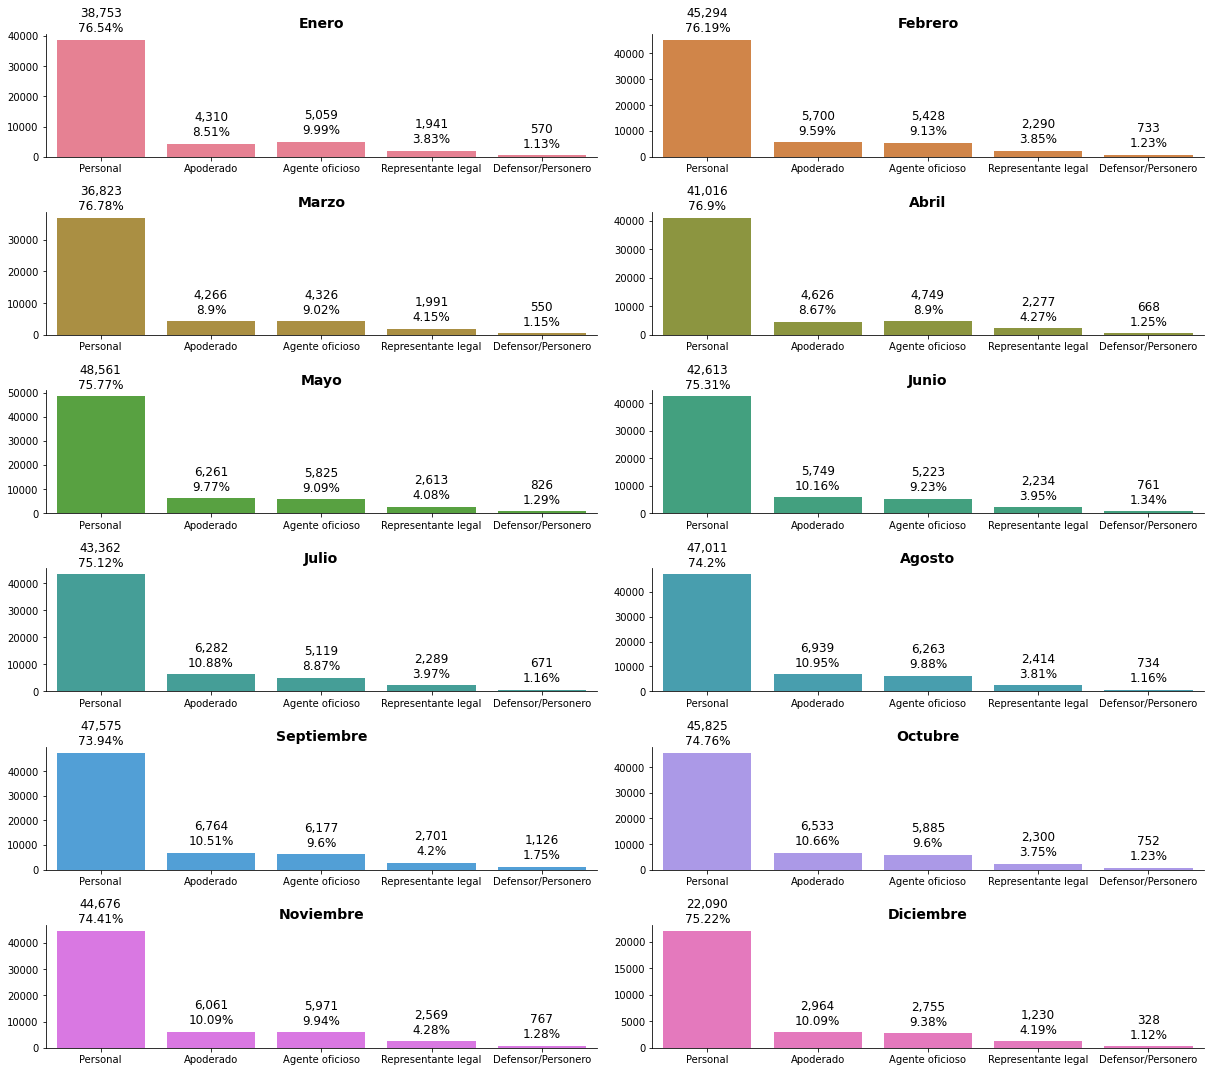

In [ ]:
# Crear un dataframe por cada mes
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df2_meses = [df2[df2['Fecha'].dt.month == i] for i in range(1, 13)]

# Crear la figura y las subgráficas
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(17, 15))

axs = axs.flatten() # aplanar las subgráficas para poder iterar sobre ellas

# Iterar sobre cada subgráfica y generar el gráfico correspondiente para cada mes
palette = sns.color_palette('husl', len(df2_meses))

for i, ax in enumerate(axs):
    count_order = df2['Legitimación'].value_counts().index.tolist()
    ex = sns.countplot(x='Legitimación', data=df2_meses[i],  color=palette[i], order=count_order, ax=ax)
    ax.set_title(meses[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    for p in ex.patches:
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()
        if np.isnan(y_pos):
            value = ''
        else:
            value = int(y_pos)
        if df2_meses[i].empty:
           percentage = 0
        else:
            percentage = round(100 / (df2_meses[i].shape[0]) * p.get_height(), 2)
    
        ax.annotate(f'{value:,}\n{percentage}%', (x_pos, y_pos), xytext=(0, 5),
                    textcoords='offset points', ha='center', va='bottom', fontsize=12)
        sns.despine()

# Ajustar los espacios entre las subgráficas
plt.tight_layout()


# Mostrar la figura
plt.show()

# Comparación entre años


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df2021 = pd.read_csv("/content/Pretensiones_reclamadas_en_las_tutelas_radicadas_en_la_Corte_Constitucional__A_o_2021.csv")

df2022 = pd.read_csv("/content/Derechos_demandados_en_las_tutelas_radicadas_en_la_Corte_Constitucional__A_o_2022 (1).csv")

# mezclar los dataframes 
df_total = pd.concat([df2021, df2022], ignore_index=True)

# Convertir la columna de fecha en un objeto de fecha y hora
df_total['Fecha'] = pd.to_datetime(df_total['Fecha'], format='%m/%d/%Y %I:%M:%S %p')
df_total



,ID_Expediente,Fecha,Municipio,Departamento,Decisión1,Impugnación,Decisión2,Legitimación,Derecho,Pretensión
0,CRECFSL,2021-01-12,Bogotá,Bogotá,Niega,Con impugnación,Confirma,Apoderado,DEBIDO PROCESO,Protección del debido proceso administrativo
1,CRECFSE,2021-01-12,Bogotá,Bogotá,Niega,Con impugnación,Confirma,Personal,DEBIDO PROCESO,Protección del debido proceso administrativo
2,CRECFSS,2021-01-12,Sincelejo,Sucre,Niega,Sin impugnación,NaN,Personal,MÍNIMO VITAL,Garantía de las condiciones básicas de subsist...
3,CRECFSC,2021-01-12,Los Palmitos,Sucre,Concede,Sin impugnación,NaN,Personal,SALUD,Entrega oportuna de medicamentos o insumos
4,CRECFSA,2021-01-12,Majagual,Sucre,Concede,Sin impugnación,NaN,Representante legal,DERECHO DE PETICIÓN,"Solicitud de información, copias, procedimientos"
...,...,...,...,...,...,...,...,...,...,...
1436284,SJHEMVO,2022-11-30,Medellín,Antioquia,Improcedente,Sin impugnación,NaN,Personal,EDUCACIÓN,NaN
1436285,SJHEVHO,2022-11-30,Pereira,Risaralda,Niega,Con impugnación,Confirma,Personal,DEBIDO PROCESO,NaN
1436286,SJHEVHE,2022-11-30,Bogotá,Bogotá,Concede,Sin impugnación,NaN,Personal,DERECHO DE PETICIÓN,NaN
1436287,SJHEVOJ,2022-11-30,Duitama,Boyacá,Improcedente,Sin impugnación,NaN,Personal,MÍNIMO VITAL,NaN


In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436289 entries, 0 to 1436288
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   ID_Expediente  1436289 non-null  object        
 1   Fecha          1436289 non-null  datetime64[ns]
 2   Municipio      1436289 non-null  object        
 3   Departamento   1436289 non-null  object        
 4   Decisión1      1433909 non-null  object        
 5   Impugnación    1436289 non-null  object        
 6   Decisión2      397753 non-null   object        
 7   Legitimación   1436289 non-null  object        
 8   Derecho        1436289 non-null  object        
 9   Pretensión     668169 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 109.6+ MB


In [ ]:
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
         7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

# Crear una columna nueva que contenga el nombre del mes 
df_total['Mes'] = df_total['Fecha'].dt.strftime('%m').apply(lambda x: meses[int(x)])
df_total

,ID_Expediente,Fecha,Municipio,Departamento,Decisión1,Impugnación,Decisión2,Legitimación,Derecho,Pretensión,Mes
0,CRECFSL,2021-01-12,Bogotá,Bogotá,Niega,Con impugnación,Confirma,Apoderado,DEBIDO PROCESO,Protección del debido proceso administrativo,Enero
1,CRECFSE,2021-01-12,Bogotá,Bogotá,Niega,Con impugnación,Confirma,Personal,DEBIDO PROCESO,Protección del debido proceso administrativo,Enero
2,CRECFSS,2021-01-12,Sincelejo,Sucre,Niega,Sin impugnación,NaN,Personal,MÍNIMO VITAL,Garantía de las condiciones básicas de subsist...,Enero
3,CRECFSC,2021-01-12,Los Palmitos,Sucre,Concede,Sin impugnación,NaN,Personal,SALUD,Entrega oportuna de medicamentos o insumos,Enero
4,CRECFSA,2021-01-12,Majagual,Sucre,Concede,Sin impugnación,NaN,Representante legal,DERECHO DE PETICIÓN,"Solicitud de información, copias, procedimientos",Enero
...,...,...,...,...,...,...,...,...,...,...,...
1436284,SJHEMVO,2022-11-30,Medellín,Antioquia,Improcedente,Sin impugnación,NaN,Personal,EDUCACIÓN,NaN,Noviembre
1436285,SJHEVHO,2022-11-30,Pereira,Risaralda,Niega,Con impugnación,Confirma,Personal,DEBIDO PROCESO,NaN,Noviembre
1436286,SJHEVHE,2022-11-30,Bogotá,Bogotá,Concede,Sin impugnación,NaN,Personal,DERECHO DE PETICIÓN,NaN,Noviembre
1436287,SJHEVOJ,2022-11-30,Duitama,Boyacá,Improcedente,Sin impugnación,NaN,Personal,MÍNIMO VITAL,NaN,Noviembre


## Tutelas 2021 vs 2022

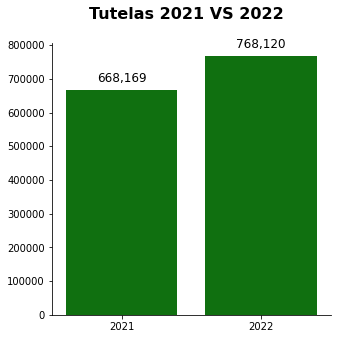

In [ ]:

# Extraer el año de la fecha
df_total['año'] = df_total['Fecha'].dt.year

# Filtrar los datos para incluir solo los registros correspondientes a los años 2021 y 2022
df_total = df_total.loc[(df_total['año'] == 2021) | (df_total['año'] == 2022)]

# Graficar el conteo por año
plt.figure(figsize=(5,5))
ex = sns.countplot(x='año', data=df_total, color='green')

# Anotar los valores en las barras
for p in ex.patches:
    x_pos = p.get_x() + p.get_width() / 2
    y_pos = p.get_height()
    value = int(p.get_height())
    percentage = round(100 / (df_total.shape[0]) * p.get_height(), 3)

  
    ex.annotate(f'{value:,}', (x_pos, y_pos), xytext=(0, 5),
            textcoords='offset points', ha='center', va='bottom', fontsize=12)


plt.xlabel("") 
plt.ylabel("") 
sns.despine()
plt.suptitle("Tutelas 2021 VS 2022", fontsize=16, fontweight='bold')
plt.show()
